# Phân tích chiến dịch giảm giá.

In [2]:
import pandas as pd
df_campaign = pd.read_csv('campaign.csv')
df_tickets = pd.read_csv('ticket_history.csv')

In [3]:
df_campaign

,campaign_code,campaign_type
0,30060,direct discount
1,26650,voucher
2,33870,voucher
3,25690,direct discount
4,23040,direct discount
...,...,...
100,23050,direct discount
101,49920,voucher
102,23110,direct discount
103,26680,voucher


In [4]:
df_tickets

,ticket_id,customer_id,paying_method,theater_name,device_id,original_price,discount_value,final_price,time,status_id,mkt_campaign_code,movie_name
0,9f2da3491b42b7599065ac102bdcb4c2,100004,credit card,33.0,3cac5d2e2eb76525aecea5c2ab46b3d9,4.54,1.28,3.26,2019-11-16 13:28:24.970,1,25690,The Grand Grandmaster
1,8607fe9d2d12e14d711c49ae1204de29,118325,credit card,20.0,9d6100d117d5f0aa65fc29b6d9edd9f7,3.09,0.00,3.09,2019-11-13 18:12:03.260,1,0,The Grand Grandmaster
2,3b6145254e74306bfa15e359ee325512,115177,bank account,113.0,684bdc0b76a40607030c561c67dc2345,9.07,2.56,6.51,2019-11-17 11:35:33.195,1,25690,The Grand Grandmaster
3,882a93bb56d6b2005c55216e6f4b64e2,116901,bank account,53.0,603473a9b300a100206c4183eb11a63f,12.78,2.56,10.22,2019-11-07 22:16:34.600,1,25680,The Grand Grandmaster
4,f3eb7c056b38244d23eed5e4cb019a44,135362,credit card,103.0,bcdee3b6e86f8bbd99a0026e28359e48,12.37,0.00,12.37,2019-11-06 22:02:55.425,1,0,The Grand Grandmaster
...,...,...,...,...,...,...,...,...,...,...,...,...
67517,822a4b093b79bc8f01e3f4428376a847,118559,debit card,43.0,ffc912a5245c4c7cda887879d39d1edd,10.31,3.79,6.52,2020-03-08 21:01:04.872,1,33100,The Gentlemen
67518,fda2a0dbc302a132ab2a890511f64921,118783,debit card,83.0,61c5a41ee0201400edaeb3b5e8a9cd84,10.72,4.21,6.51,2020-02-22 08:54:05.422,1,33100,The Gentlemen
67519,cd01413c6a2b85ecf0e0083393fbddfc,121610,credit card,43.0,0ca2218c16df3af9f95f190717047cc3,12.37,0.00,12.37,2020-02-28 08:16:42.213,1,0,The Gentlemen
67520,311f201448bbadfaf229f0457fd3652a,125872,balance,104.0,509f3a9ff38b8566cff3e03955a08c7e,10.68,0.00,10.68,2020-02-21 18:34:40.420,1,0,The Gentlemen


## Merge 2 bản campaign và history_stiket


In [7]:
merged_df = pd.merge(
    df_tickets,
    df_campaign,
    how="inner",
    left_on="mkt_campaign_code",
    right_on="campaign_code"
)

In [8]:
merged_df

,ticket_id,customer_id,paying_method,theater_name,device_id,original_price,discount_value,final_price,time,status_id,mkt_campaign_code,movie_name,campaign_code,campaign_type
0,9f2da3491b42b7599065ac102bdcb4c2,100004,credit card,33.0,3cac5d2e2eb76525aecea5c2ab46b3d9,4.54,1.28,3.26,2019-11-16 13:28:24.970,1,25690,The Grand Grandmaster,25690,direct discount
1,3b6145254e74306bfa15e359ee325512,115177,bank account,113.0,684bdc0b76a40607030c561c67dc2345,9.07,2.56,6.51,2019-11-17 11:35:33.195,1,25690,The Grand Grandmaster,25690,direct discount
2,882a93bb56d6b2005c55216e6f4b64e2,116901,bank account,53.0,603473a9b300a100206c4183eb11a63f,12.78,2.56,10.22,2019-11-07 22:16:34.600,1,25680,The Grand Grandmaster,25680,direct discount
3,773c2468d22661e00afae35498866e46,137661,debit card,81.0,5838684e43821f9ac995717b7440bf6a,10.72,1.32,9.40,2019-11-24 19:22:07.625,1,25700,The Grand Grandmaster,25700,direct discount
4,2737934f95e5f073b8a2b9f73b41af38,118518,balance,103.0,a8d2289de50322b454f68586e5f93015,4.54,1.28,3.26,2019-11-10 18:01:54.865,1,25680,The Grand Grandmaster,25680,direct discount
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34781,03cde24c89bf8edfa389a055289512bd,100592,credit card,3.0,0c4174ada4da7f654f6a3bc5e3428cc5,11.92,2.14,9.78,2020-02-23 16:30:28.480,1,33100,The Gentlemen,33100,direct discount
34782,0f991b86505ce444d2a170a51ff28638,137213,credit card,19.0,e769d985ef1ee3a6eb8e74ad946dc1b4,12.33,2.56,9.77,2020-02-22 08:15:47.017,1,33100,The Gentlemen,33100,direct discount
34783,ebbba377f42e3f9a3e1348a7abe7188a,101169,credit card,9.0,f9c657a78ca366e8652d1719e73b5a39,9.07,2.56,6.51,2020-02-23 20:52:40.576,1,33100,The Gentlemen,33100,direct discount
34784,822a4b093b79bc8f01e3f4428376a847,118559,debit card,43.0,ffc912a5245c4c7cda887879d39d1edd,10.31,3.79,6.52,2020-03-08 21:01:04.872,1,33100,The Gentlemen,33100,direct discount


Vẽ biểu đồ biể thị giá Final so với từng chiến dịch

In [12]:
import matplotlib.pyplot as plt

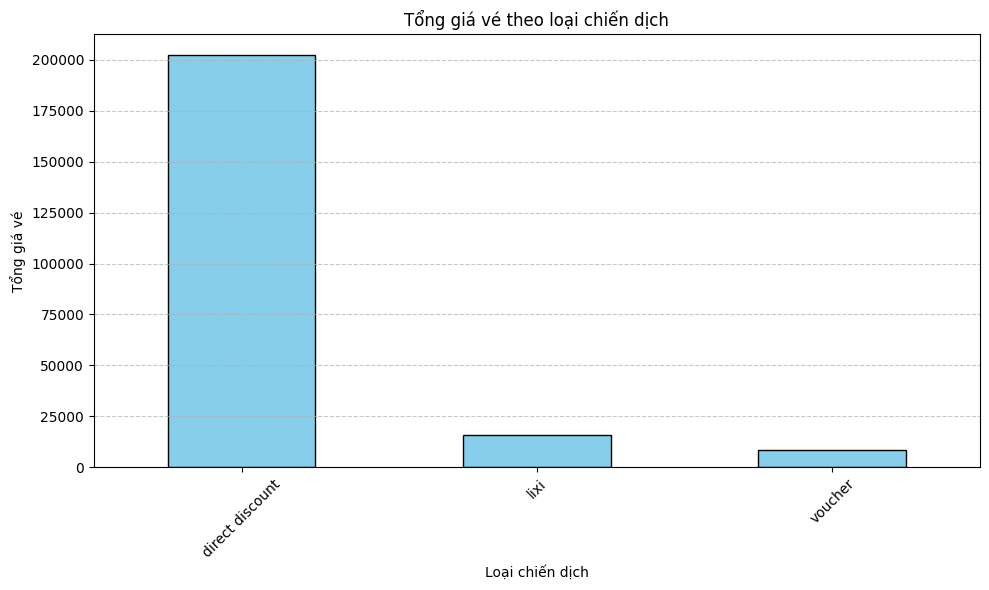

In [15]:
Tong_ban_ve = merged_df.groupby("campaign_type")["final_price"].sum().sort_values(ascending=False)
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
Tong_ban_ve.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Tổng giá vé theo loại chiến dịch")
plt.xlabel("Loại chiến dịch")
plt.ylabel("Tổng giá vé")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()